In [3]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns= inspector.get_columns('measurement')
for c in columns:
    print(c['name'])

id
station
date
prcp
tobs


In [14]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'])

id
station
name
latitude
longitude
elevation


# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(func.count(Measurement.date)).all()


    
# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


[(19550)]

In [16]:
#Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>'2016-08-23').\
    order_by(Measurement.date).all()

date = [result[0] for result in results[:]]
precipitation = [str(result[1]) for result in results[:]]

df = pd.DataFrame(results[:], columns= ['date','prcp'])
df.set_index('date', inplace=True,)
df.head(10)




,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


<IPython.core.display.Javascript object>


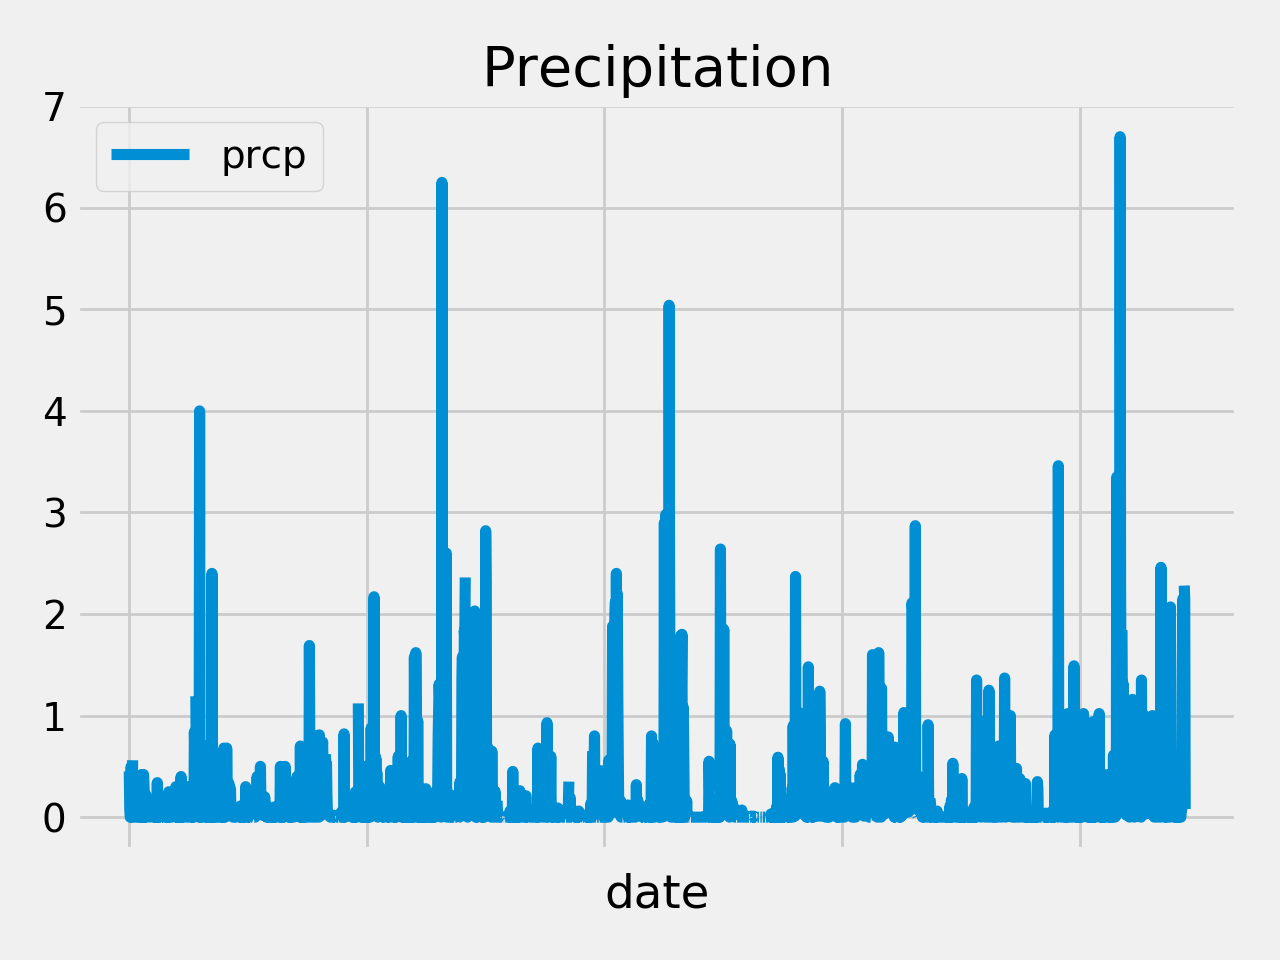

<function matplotlib.pyplot.show(*args, **kw)>

In [18]:
df.iloc[::-1].plot.line(title="Precipitation")
plt.tight_layout()
plt.show

In [19]:
# Calculate the date 1 year ago from today

year_ago = dt.date.today()- dt.timedelta(days=365)
print(year_ago)

2017-08-21


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [21]:
# How many stations are available in this dataset?
%config IPCompleter.greedy=True

session.query(Station.station, Station.name)

df = pd.DataFrame(results[:], columns= ['station','name'])
df.head(20)

,station,name
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [22]:
# What are the most active stations?
ActiveStations= session.query(Measurement.station, Measurement.tobs).group_by(Measurement.station).all() 
print(ActiveStations)

activeStations=pd.DataFrame(ActiveStations)
activeStations

# List the stations and the counts in descending order.
                                                                           
activeStations.sort_values(by=['station'], ascending=False)


[('USC00511918', 64.0), ('USC00513117', 77.0), ('USC00514830', 82.0), ('USC00516128', 76.0), ('USC00517948', 81.0), ('USC00518838', 70.0), ('USC00519281', 79.0), ('USC00519397', 81.0), ('USC00519523', 82.0)]


,station,tobs
8,USC00519523,82.0
7,USC00519397,81.0
6,USC00519281,79.0
5,USC00518838,70.0
4,USC00517948,81.0
3,USC00516128,76.0
2,USC00514830,82.0
1,USC00513117,77.0
0,USC00511918,64.0


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

# activeStation = session.query(Measurement).filter(Measurement.station == "USC00519523").count()
# activeStation

lowTemp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519523").all()
     
print(lowTemp)

highTemp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519523").all()
print(highTemp)

avgTemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519523").all()
print(avgTemp)

[(56.0,)]
[(85.0,)]
[(74.5436493068565,)]


In [27]:
# Choose the station with the highest number of temperature observations.


Results1= session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>'2016-08-23').\
    order_by(Measurement.date).filter(Measurement.station == "USC00519523").all()

Results1

date = [Results[0] for Results in Results1[:]]
tobs = [Results[1] for Results in Results1[:]]

tobsDf = pd.DataFrame(results[:], columns= ['date','tobs'])
tobsDf.set_index('date', inplace=True,)
tobsDf.head(10)


,tobs
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


<IPython.core.display.Javascript object>


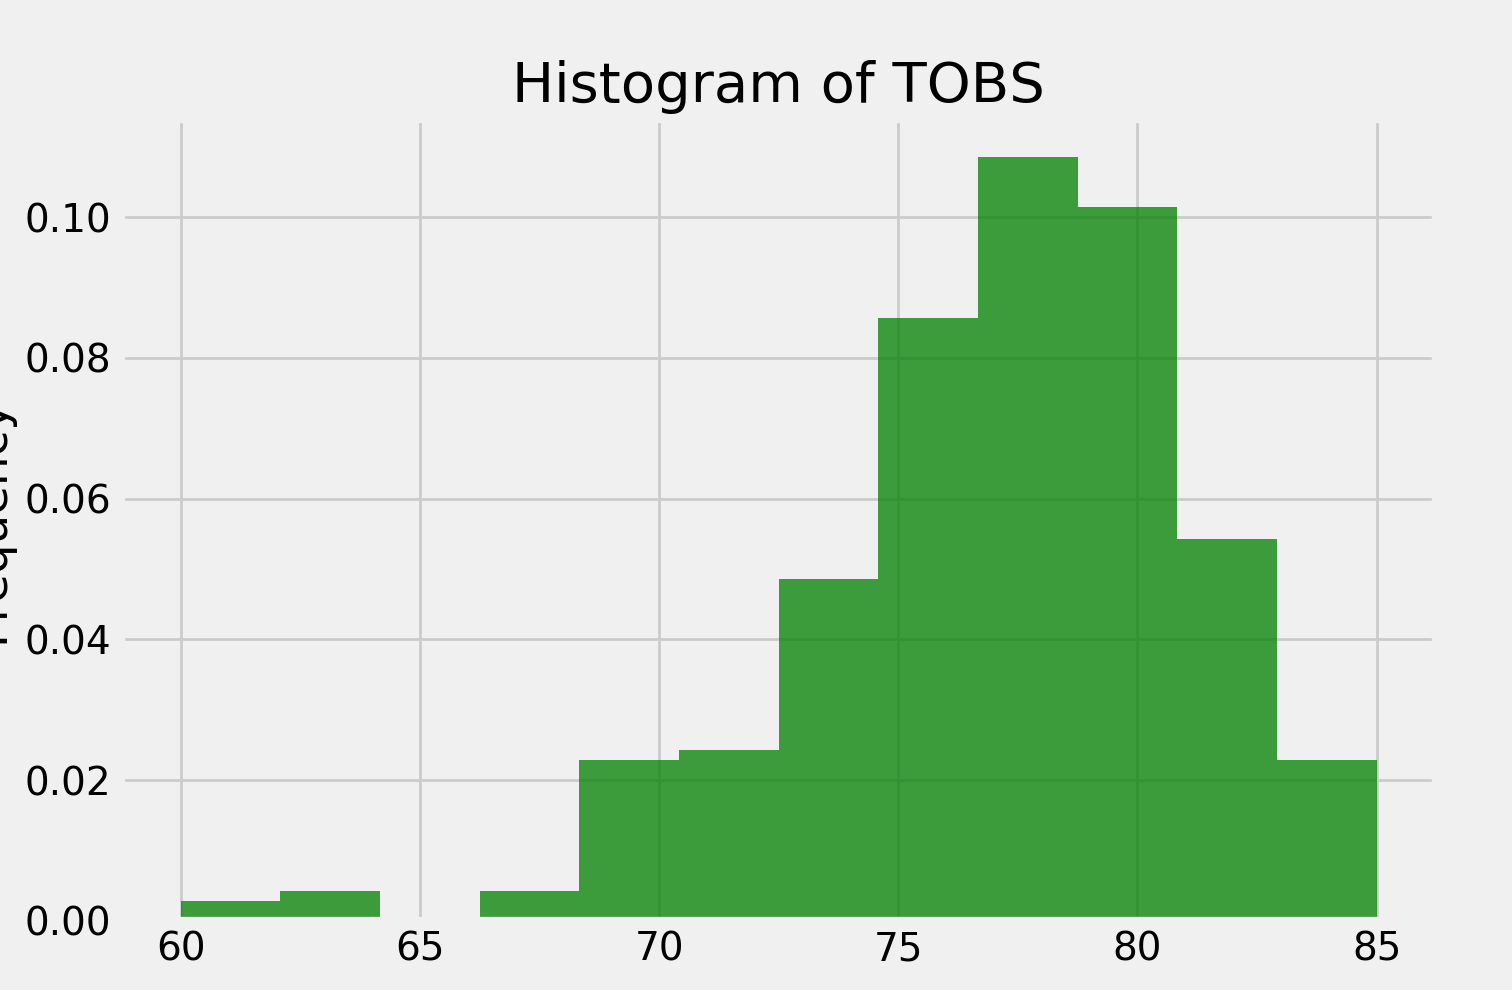

In [34]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


x = tobs

# the histogram of the data
n, bins, patches = plt.hist(x, 12, density=True, facecolor='g', alpha=0.75)



plt.ylabel('Frequency')
plt.title('Histogram of TOBS')
plt.xlimit = [80,92,2]
plt.ylimit = [0,25,5]
plt.grid(True)
plt.show()



In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
